In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df=pd.read_csv("AdmissionData.csv")
col_names=df.columns.tolist()
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [12]:
df.drop(['Serial No.'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=df[x]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/amoghr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [14]:
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [15]:
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)
score = accuracy_score(cy_test, rf.predict(x_test))
print("Accuracy Acheived= ", score*100,"%!")
print(classification_report(rf.predict(x_test), cy_test))

Accuracy Acheived=  97.0 %!
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.90      0.95      0.92        19

    accuracy                           0.97       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.97      0.97      0.97       100



In [16]:
test_set_sme = mean_squared_error(cy_test, rf.predict(x_test))
test_set_rmse = np.sqrt(test_set_sme)
test_set_r2 = r2_score(cy_test, rf.predict(x_test))
print("Squared Mean Error= ", test_set_sme)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.03
Root Squared Mean Error=  0.17320508075688773
Coefficient of Determination=  0.8125


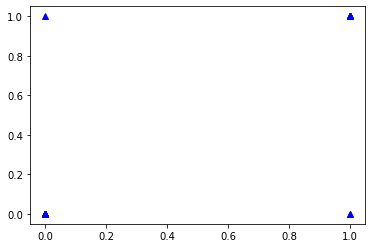

In [17]:
plt.plot(cy_test,rf.predict(x_test),'^',color='blue');